In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers, models

# Giải thích Code Settings
## 1. Số lượng mẫu dữ liệu
```python
nsamples = 1000     # Number of samples to use as a dataset
```
* Định nghĩa tổng số mẫu dữ liệu sẽ được tạo ra
* `nsamples = 1000` nghĩa là sẽ tạo 1000 điểm dữ liệu

## 2. Tỷ lệ phân chia dữ liệu
```python
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
```
* **Validation set (20%)**: 
  * `val_ratio = 0.2` nghĩa là 20% dữ liệu dùng để kiểm định
  * Dùng để đánh giá mô hình trong quá trình huấn luyện

* **Test set (20%)**:
  * `test_ratio = 0.2` nghĩa là 20% dữ liệu dùng để kiểm tra
  * Dùng để đánh giá mô hình sau khi huấn luyện xong

* **Training set (60%)**:
  * Phần còn lại của dữ liệu
  * Dùng để huấn luyện mô hình

In [3]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
tflite_model_name = 'sine_model'  # Will be given .tflite suffix
c_model_name = 'sine_model'       # Will be given .h suffix

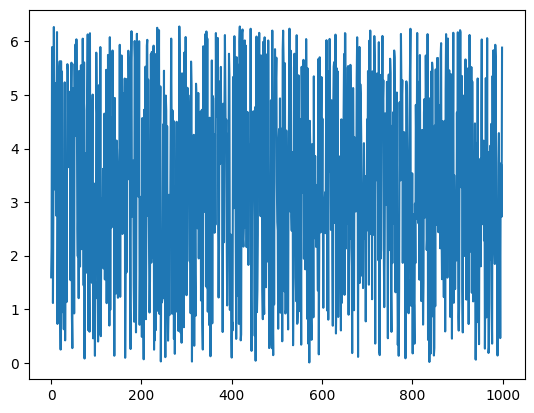

In [4]:
# Generate some random samples
#np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

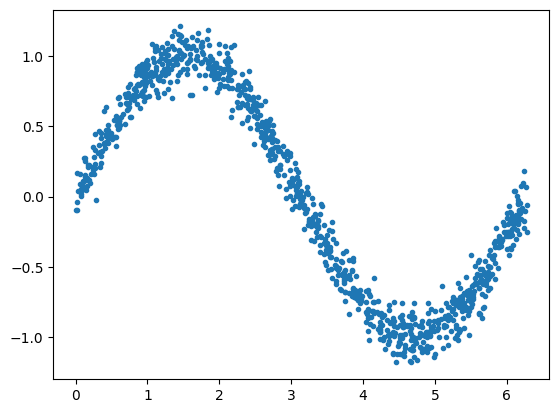

In [5]:

# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

(600,)
(600,)


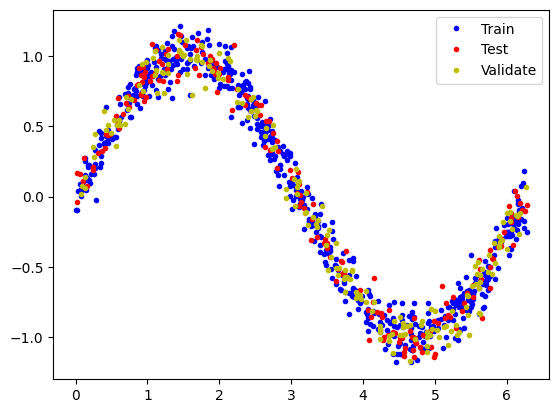

In [6]:

# Plit the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, [val_split, test_split])
print(x_train.shape)
print(y_train.shape)
# Check that our splits add up correctly
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.legend()
plt.show()
     


In [7]:

# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='sigmoid', input_shape=(1,)))
model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(1))

/Users/nnminh/Workspaces/esp32-code/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


param = (trong so weigth + bias)*neurons =32

In [8]:
# View model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Bộ tối ưu (optimizer) là thuật toán được sử dụng để cập nhật các trọng số (weights) của mô hình sao cho hàm mất mát (loss function) hay cost function đạt giá trị nhỏ nhất có thể trên tập dữ liệu huấn luyện.

(Root Mean Square Propagation) RMSprop: RMSprop là một thuật toán tối ưu hóa thích ứng, có khả năng tự động điều chỉnh tốc độ học (learning rate) cho từng trọng số. Nó thường hoạt động tốt trong các bài toán học sâu.

new_weight = old_weight - learning_rate * update

Ngoài ra có thể dùng các thuật toán mặc định như "Adam (Adaptive Moment Estimation)": Nó thích ứng với từng tham số bằng cách tính toán các tỷ lệ học tập riêng biệt, giúp tăng tốc độ hội tụ và hiệu suất.

In [9]:

# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

Tập dữ liệu huấn luyện (x_train, y_train) được chia thành các batch nhỏ hơn, mỗi batch có kích thước là 32 trong trường hợp này. giúp tăng tốc độ huấn luyện.

In [10]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size = 32,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6738 - mae: 0.6738 - val_loss: 0.6495 - val_mae: 0.6495
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5930 - mae: 0.5930 - val_loss: 0.6003 - val_mae: 0.6003
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5707 - mae: 0.5707 - val_loss: 0.5687 - val_mae: 0.5687
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5458 - mae: 0.5458 - val_loss: 0.5484 - val_mae: 0.5484
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5323 - mae: 0.5323 - val_loss: 0.5311 - val_mae: 0.5311
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5122 - mae: 0.5122 - val_loss: 0.5177 - val_mae: 0.5177
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4901 - mae: 0.4901 - val_loss: 0.5062 - val_mae: 0.5062
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4883 - mae: 0.4883 - val_loss: 0.4883 - val_mae: 0.4883
Epoch 9/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.479

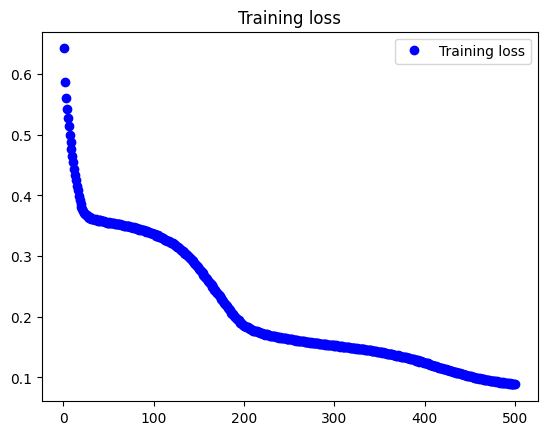

In [11]:
# Plot the training history
loss = history.history['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

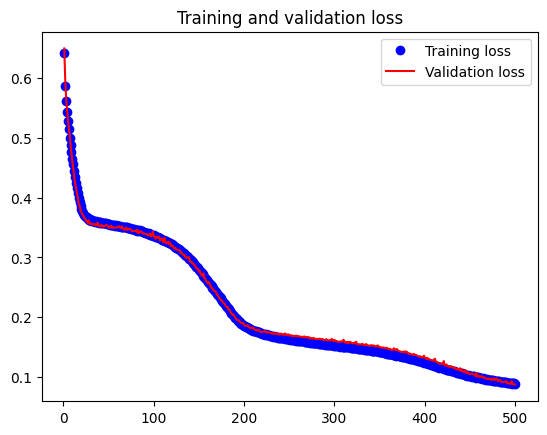

In [12]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


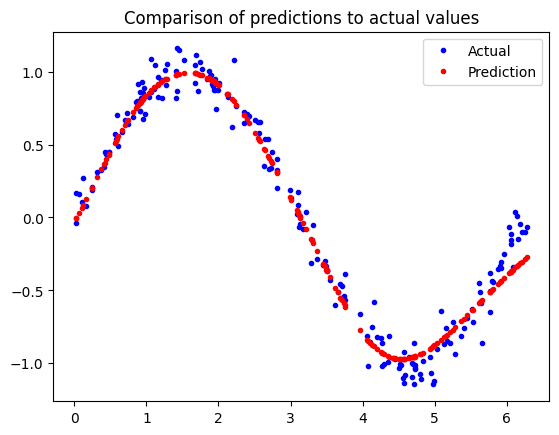

In [13]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()

#correlation coeff.

In [14]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/r1/tw5td3151yzd61pfsmsp16gh0000gn/T/tmp0dkbbe4i/assets


INFO:tensorflow:Assets written to: /var/folders/r1/tw5td3151yzd61pfsmsp16gh0000gn/T/tmp0dkbbe4i/assets


Saved artifact at '/var/folders/r1/tw5td3151yzd61pfsmsp16gh0000gn/T/tmp0dkbbe4i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  5963943376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5963944528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5963944144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5963944912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5963942416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5963943952: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1740494663.227423 3963547 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1740494663.227638 3963547 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-02-25 21:44:23.228576: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/r1/tw5td3151yzd61pfsmsp16gh0000gn/T/tmp0dkbbe4i
2025-02-25 21:44:23.228864: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-02-25 21:44:23.228869: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/r1/tw5td3151yzd61pfsmsp16gh0000gn/T/tmp0dkbbe4i
I0000 00:00:1740494663.231963 3963547 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-02-25 21:44:23.233665: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-02-25 21:44:23.257971: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

3396

In [15]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

In [16]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))